In [1]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import pandas as pd
import ipywidgets as widgets
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path

data_path = Path('data', 'clean')

In [3]:
# loading the data
data_file = Path(data_path, 'revenue_per_person.csv')
total_revenue = pd.read_csv(data_file)

In [4]:
# create an array with the delta value between row_index_x and row_index_y

def delta(df, row_index_x, row_index_y, label='Difference'):
    d = [label]
    for i in range(1, len(df.columns)):
        d.append(abs(df.iloc[row_index_x, i] - df.iloc[row_index_y, i]))
    
    return d

## Revenue per person (excluding North Sea)

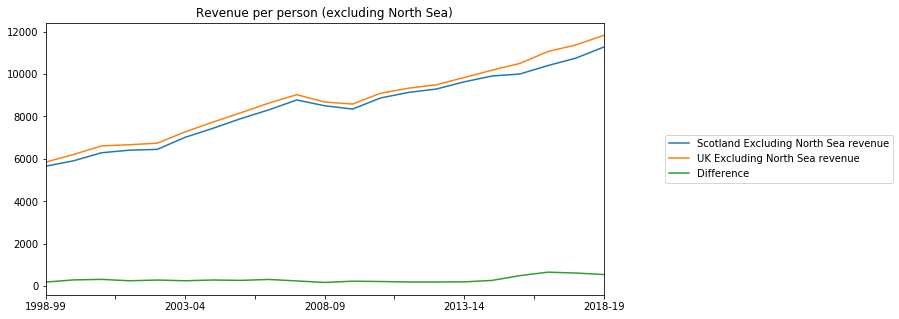

In [5]:
revenue_excluding_ns = total_revenue.take([0, 3]).copy().reset_index(drop=True)
revenue_excluding_ns.loc[len(revenue_excluding_ns.index)] = delta(revenue_excluding_ns, 0, 1)
rpp_ens = revenue_excluding_ns.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Revenue per person (excluding North Sea)', color='black')
rpp_ens.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## Revenue per person (including North Sea)

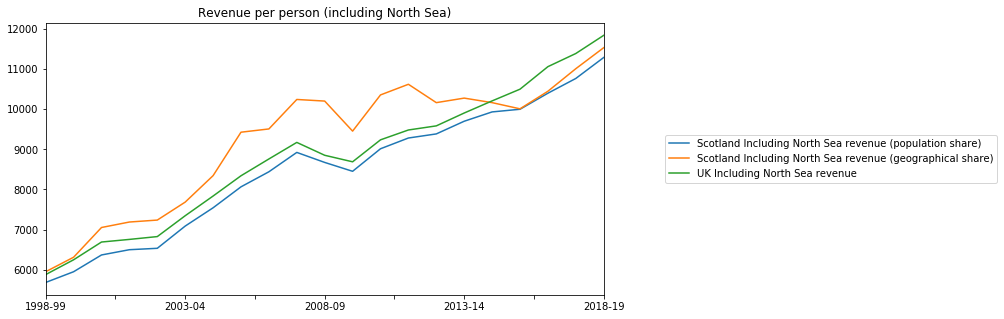

In [6]:
revenue_including_ns = total_revenue.take([1, 2, 4]).copy().reset_index(drop=True)

rpp_ins = revenue_including_ns.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Revenue per person (including North Sea)', color='black')
rpp_ins.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Population Share

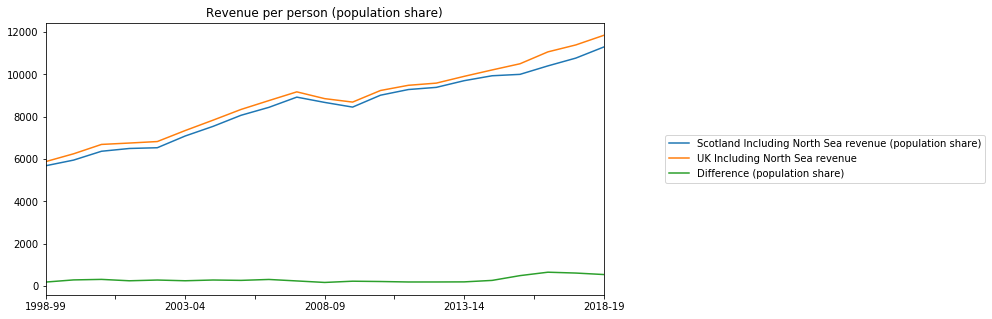

In [7]:
revenue_ps = total_revenue.take([1, 4]).copy().reset_index(drop=True)

revenue_ps.loc[len(revenue_ps.index)] = delta(revenue_ps, 0, 1, 'Difference (population share)')

revenue_ps_t = revenue_ps.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Revenue per person (population share)', color='black')
revenue_ps_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Geographic Share

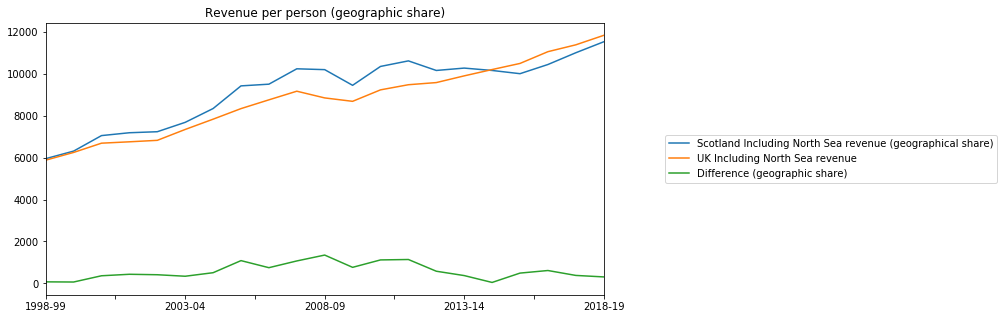

In [8]:
revenue_ps = total_revenue.take([2, 4]).copy().reset_index(drop=True)

revenue_ps.loc[len(revenue_ps.index)] = delta(revenue_ps, 0, 1, 'Difference (geographic share)')

revenue_ps_t = revenue_ps.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Revenue per person (geographic share)', color='black')
revenue_ps_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()